In [1]:
from cftime import DatetimeNoLeap
from os import chdir, system
from numpy import float64, multiply
from xarray import open_dataset

In [28]:
chdir('/home/zhangc/scenariomip_cmip6/nc_data/')

In [37]:
ls

hus_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc
ps_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc
ta_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc
ts_Amon_CESM2_ssp245_r2i1p1f1_gn_201501-206412.nc
ua_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc
va_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc


In [7]:
dt = 2015, 1, 1, 0
data_time = DatetimeNoLeap(dt[0], dt[1], dt[2], dt[3])
file_time = str(data_time).replace(' ', '_')

In [38]:
ds = open_dataset('ts_Amon_CESM2_ssp245_r2i1p1f1_gn_201501-206412.nc')

/home/zhangc/miniconda3/envs/python3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [26]:
da = ds.isel(time=0,lev=0).ta

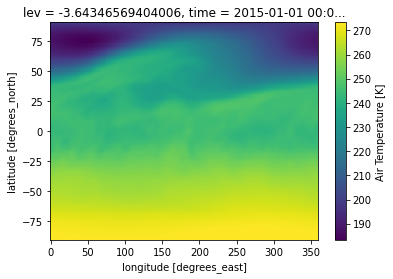

In [27]:
da.plot()